<a href="https://colab.research.google.com/github/9characters/Regression-Performance-Analysis/blob/master/Lattice_Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Upload Data and Required python files

In [1]:
!git clone https://github.com/9characters/Regression-Performance-Analysis

Cloning into 'Regression-Performance-Analysis'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 12 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), done.


In [2]:
cd Regression-Performance-Analysis/

/content/Regression-Performance-Analysis


#Importing Libraries

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

from display import *
from helper import *

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


#Importing and Processing Data

In [4]:
columns = ["compound", "ra", "rb", "fe", "bg", "a", "b", "c", "shape"]
inputs = {0:"ra", 1:"rb", 2:"fe", 3:"bg"}
mapping = {0:"a", 1:"b", 2:"c"}

data = pd.read_excel("cubic and orthorhomic.xlsx", sheet_name='cubic')
data.columns = columns

In [5]:
#Separating the dependent and independent variables
X = data.iloc[:, 1:5].dropna().values
y = data.iloc[:, 5:-1].dropna().values

In [6]:
#Standardizing the data
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = scaler.transform(X)

In [7]:
#Dictionaries to store the r2_scores from different regressors
r2_scores = {}
predictions = {}

#Assigining the regressor and working with it

In [8]:
'''
NOTE:
Random Forest = RF
Decision Tree = DT
Linear Regression = LR
K Nearest Neighbour = KNN
Linear SVR = LSVR
Polynomial SVR = PSVR
RBF Kernel SVR = RBFSVR
'''

'\nNOTE:\nRandom Forest = RF\nDecision Tree = DT\nLinear Regression = LR\nK Nearest Neighbour = KNN\nLinear SVR = LSVR\nPolynomial SVR = PSVR\nRBF Kernel SVR = RBFSVR\n'

In [9]:
r_models = ["ANN", "RF", "DT", "LR", "KNN", "LSVR", "PSVR", "RBFSVR"]


WORKING FOR ANN MODEL
R2 Score: 0.793
R2 Score: 0.786
R2 Score: 0.86
R2 Score: 0.829
R2 Score: 0.769
R2 Score: 0.801
R2 Score: 0.794
R2 Score: 0.821
R2 Score: 0.764
R2 Score: 0.792
R2 Score: 0.865
R2 Score: 0.803
R2 Score: 0.824
R2 Score: 0.716
R2 Score: 0.8
R2 Score: 0.804
Optimal R2 Score for ANN is 0.865


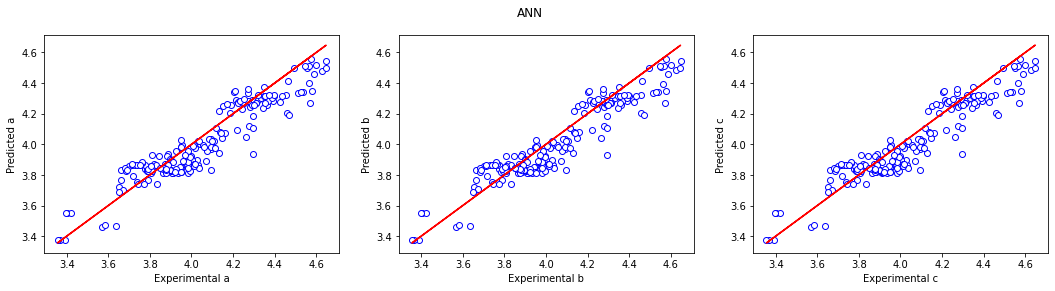

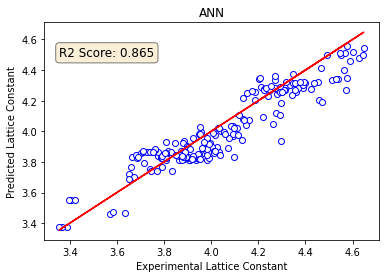


WORKING FOR RANDOM FOREST MODEL
R2 Score: 0.891
R2 Score: 0.84
R2 Score: 0.919
R2 Score: 0.942
R2 Score: 0.83
R2 Score: 0.909
R2 Score: 0.846
R2 Score: 0.853
R2 Score: 0.784
R2 Score: 0.868
R2 Score: 0.875
R2 Score: 0.912
R2 Score: 0.899
R2 Score: 0.782
R2 Score: 0.91
R2 Score: 0.852
Optimal R2 Score for Random Forest is 0.942

Feature Importance:
ra:	0.067
rb:	0.825
fe:	0.101
bg:	0.008


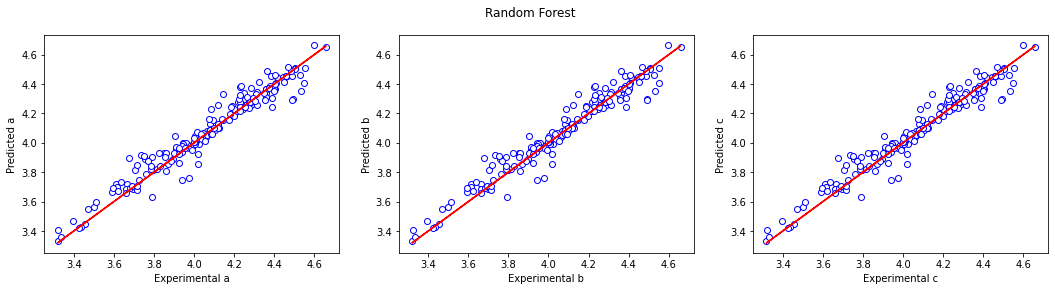

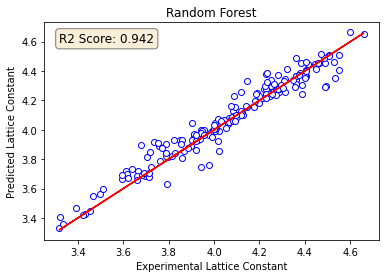


WORKING FOR DECISION TREE MODEL
R2 Score: 0.845
R2 Score: 0.753
R2 Score: 0.887
R2 Score: 0.903
R2 Score: 0.808
R2 Score: 0.796
R2 Score: 0.731
R2 Score: 0.802
R2 Score: 0.722
R2 Score: 0.806
R2 Score: 0.87
R2 Score: 0.84
R2 Score: 0.843
R2 Score: 0.713
R2 Score: 0.829
R2 Score: 0.797
Optimal R2 Score for Decision Tree is 0.903


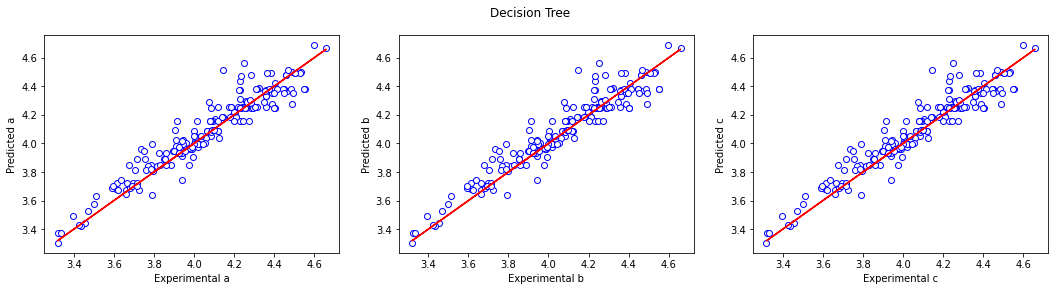

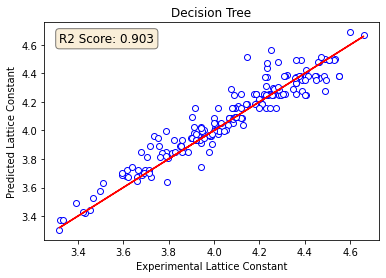


WORKING FOR LINEAR REGRESSION MODEL
R2 Score: 0.71
R2 Score: 0.682
R2 Score: 0.724
R2 Score: 0.716
R2 Score: 0.706
R2 Score: 0.719
R2 Score: 0.684
R2 Score: 0.738
R2 Score: 0.678
R2 Score: 0.675
R2 Score: 0.737
R2 Score: 0.714
R2 Score: 0.702
R2 Score: 0.625
R2 Score: 0.712
R2 Score: 0.638
Optimal R2 Score for Linear Regression is 0.738

Approximated Equations from Linear Model:
a = 0.001ra + 0.05rb + -0.088fe + -0.009bg + 4.389
b = 0.001ra + 0.05rb + -0.088fe + -0.009bg + 4.389
c = 0.001ra + 0.05rb + -0.088fe + -0.009bg + 4.389


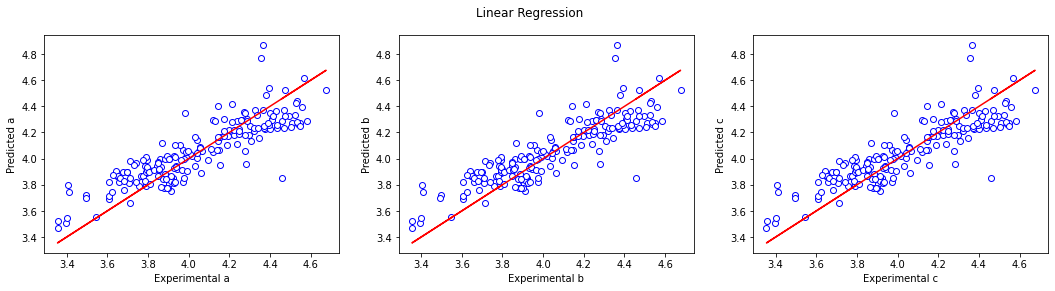

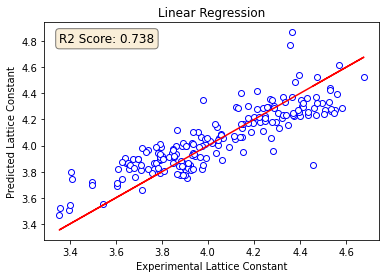


WORKING FOR KNN MODEL
R2 Score: 0.828
R2 Score: 0.784
R2 Score: 0.883
R2 Score: 0.902
R2 Score: 0.774
R2 Score: 0.842
R2 Score: 0.824
R2 Score: 0.822
R2 Score: 0.751
R2 Score: 0.832
R2 Score: 0.856
R2 Score: 0.807
R2 Score: 0.839
R2 Score: 0.697
R2 Score: 0.876
R2 Score: 0.816
Optimal R2 Score for KNN is 0.902


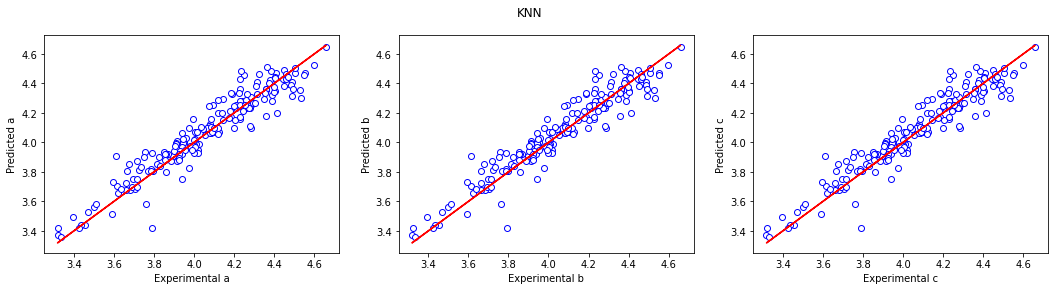

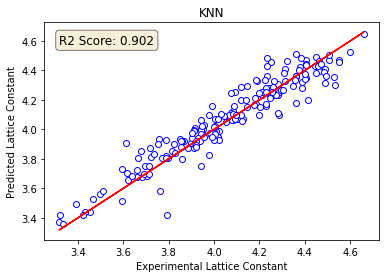


WORKING FOR LINEAR SVR MODEL
R2 Score: 0.702
R2 Score: 0.672
R2 Score: 0.721
R2 Score: 0.696
R2 Score: 0.699
R2 Score: 0.726
R2 Score: 0.649
R2 Score: 0.738
R2 Score: 0.695
R2 Score: 0.67
R2 Score: 0.764
R2 Score: 0.716
R2 Score: 0.698
R2 Score: 0.628
R2 Score: 0.723
R2 Score: 0.603
Optimal R2 Score for Linear SVR is 0.764

Approximated Equations from Linear SVR Model: 
a = 0.001ra + 0.053rb + -0.088fe + -0.009bg + 4.401
b = 0.001ra + 0.053rb + -0.088fe + -0.009bg + 4.401
c = 0.001ra + 0.053rb + -0.088fe + -0.009bg + 4.401


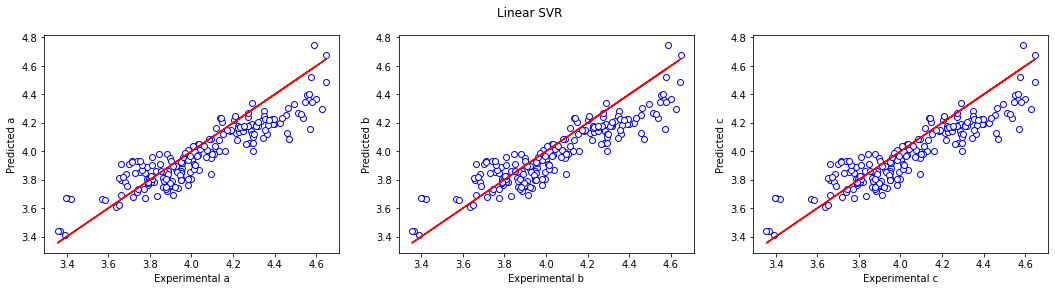

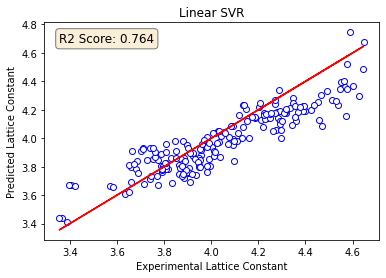


WORKING FOR POLYNOMIAL SVR MODEL
R2 Score: 0.519
R2 Score: 0.512
R2 Score: 0.491
R2 Score: 0.608
R2 Score: 0.586
R2 Score: 0.377
R2 Score: 0.583
R2 Score: 0.621
R2 Score: 0.531
R2 Score: 0.607
R2 Score: 0.671
R2 Score: 0.284
R2 Score: 0.625
R2 Score: 0.585
R2 Score: 0.564
R2 Score: 0.6
Optimal R2 Score for Polynomial SVR is 0.671

Approximated Equations from Polynomial SVR Model: 
a = 1.0ra + 1.0rb + -1.0fe + -1.0bg + 4.235
b = 1.0ra + 1.0rb + -1.0fe + -1.0bg + 4.235
c = 1.0ra + 1.0rb + -1.0fe + -1.0bg + 4.235


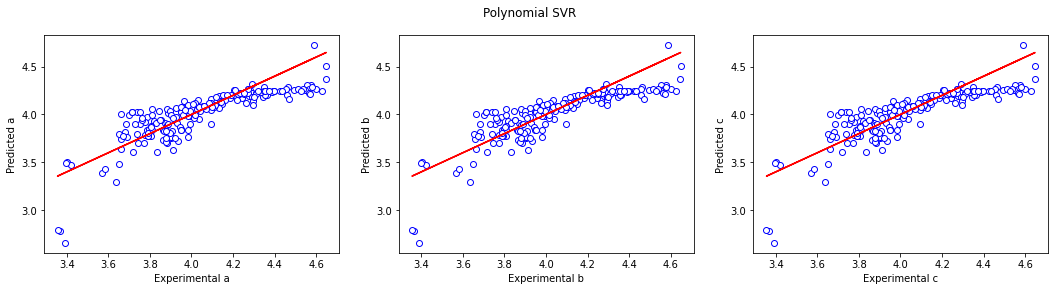

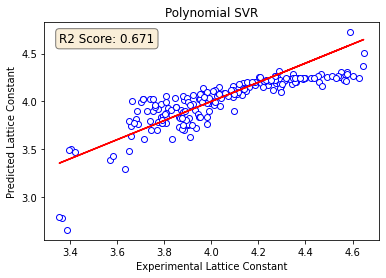


WORKING FOR RBF KERNEL SVR MODEL
R2 Score: 0.788
R2 Score: 0.732
R2 Score: 0.853
R2 Score: 0.835
R2 Score: 0.745
R2 Score: 0.802
R2 Score: 0.78
R2 Score: 0.829
R2 Score: 0.74
R2 Score: 0.787
R2 Score: 0.861
R2 Score: 0.787
R2 Score: 0.797
R2 Score: 0.704
R2 Score: 0.791
R2 Score: 0.792
Optimal R2 Score for RBF Kernel SVR is 0.861

Approximated Equations from RBF Kernel SVR Model: 
a = 1.0ra + 0.447rb + 1.0fe + 1.0bg + 4.077
b = 1.0ra + 0.447rb + 1.0fe + 1.0bg + 4.077
c = 1.0ra + 0.447rb + 1.0fe + 1.0bg + 4.077


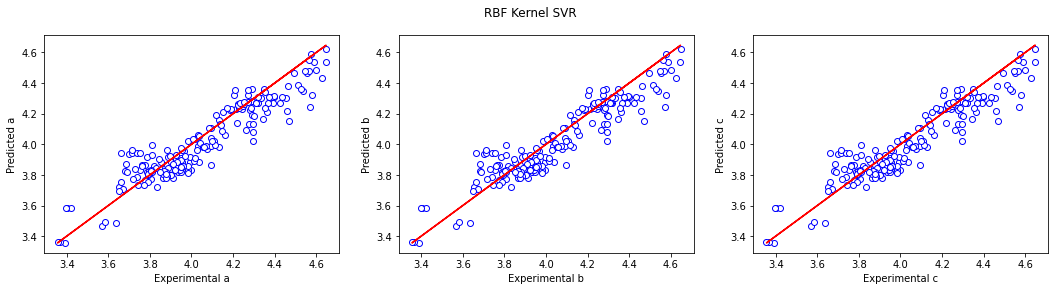

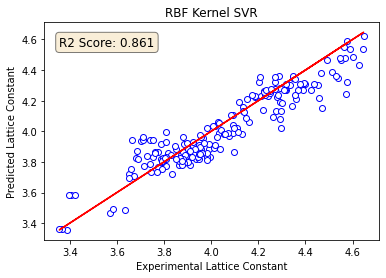

In [10]:
for r_model in r_models:
    #Prompt to get the regression model
    prompt = r_model

    #Getting the best 16-folds cross validated data
    X_train, X_test, y_train, y_test, y_pred, regressor, model, r2_score, coffs, intercepts = get_best_data(X,y, prompt)
    print(f"Optimal R2 Score for {regressor} is {r2_score}")

    #Storing the r2_score and predictions in the dictionaries
    r2_scores[regressor] = r2_score
    predictions[regressor] = y_pred

    # Analysis for Random Forest Regressor:
    if prompt == "RF":
        print("\nFeature Importance:")
        for i,c in enumerate(columns[1:-4]):
            print(f"{c}:\t{model.feature_importances_[i].round(3)}")

    # Analysis for Linear Regressor:
    if prompt == "LR":
        coffs = np.round(model.coef_, 3)
        intercepts = np.round(model.intercept_, 3)
        
        print("\nApproximated Equations from Linear Model:")
        for i in mapping:
            print(f"{mapping[i]} = {coffs[i][0]}{inputs[0]} + {coffs[i][1]}{inputs[1]} + {coffs[i][2]}{inputs[2]} + {coffs[i][3]}{inputs[3]} + {intercepts[i]}")

    # Analysis for Support Vector Regressor:
    if "SVR" in prompt:
        print(f"\nApproximated Equations from {regressor} Model: ")
        for i in mapping:
            print(f"{mapping[i]} = {coffs[i][0][0]}{inputs[0]} + {coffs[i][0][1]}{inputs[1]} + {coffs[i][0][2]}{inputs[2]} + {coffs[i][0][3]}{inputs[3]} + {intercepts[i]}")

    #Display Plots
    exp_vs_pred_subplots(y_test, y_pred, regressor)

    exp_vs_pred_lc(y_test, y_pred, regressor, r2_score)

    names = X_test[:, 0]
    exp_vs_pred_plotly(y_test, y_pred, regressor, names)

#Comparision of performance of all regression models

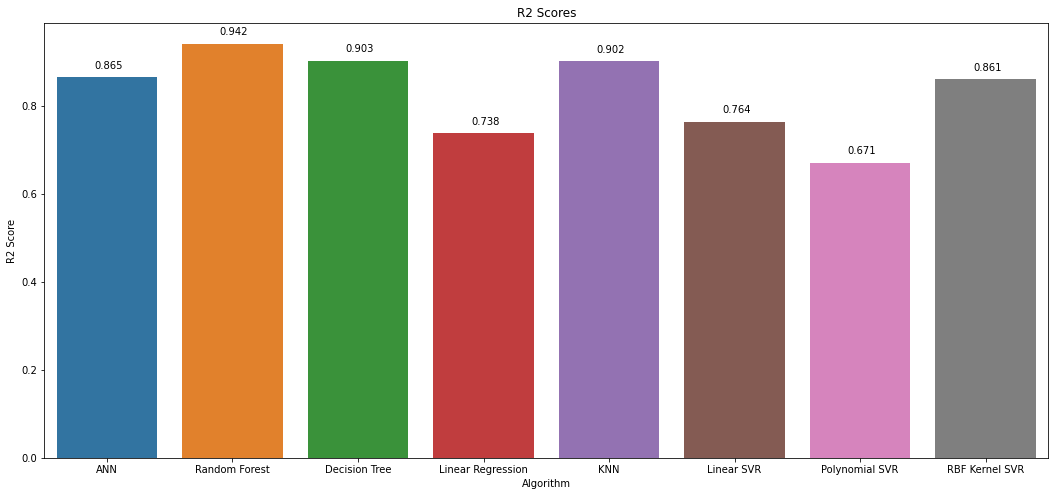

In [11]:
comparision(r2_scores)

#Calculating PAD and Predicted value for Table

In [12]:
prediction_table = pd.concat([
       pd.DataFrame(v, columns=['a', 'b', 'c'], index=np.repeat(k, len(v))) 
       for k, v in predictions.items()
  ]
).rename_axis('algorithm').reset_index()

In [13]:
print(prediction_table.head())

  algorithm         a         b         c
0       ANN  4.555202  4.555165  4.555716
1       ANN  3.936598  3.937101  3.936441
2       ANN  4.544831  4.545137  4.545218
3       ANN  3.838431  3.839016  3.838070
4       ANN  4.118531  4.118562  4.118623


In [14]:
pad = lambda y_true, y_pred: ( np.abs(y_true - y_pred) / y_true) * 100

In [15]:
pads = {}
for algo, y_pred in predictions.items():
    pads[algo] = pad(y_test, y_pred)
    
pad_table = pd.concat([
       pd.DataFrame(v, columns=['a', 'b', 'c'], index=np.repeat(k, len(v))) 
       for k, v in pads.items()
  ]
).rename_axis('algorithm').reset_index()

In [19]:
print(pad_table.head())

  algorithm         a         b         c
0       ANN  0.476261  0.477053  0.465030
1       ANN  1.275992  1.288935  1.271963
2       ANN  2.198606  2.192008  2.190263
3       ANN  1.680288  1.695781  1.670720
4       ANN  3.705150  3.704414  3.702998
